In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fake_job_postings.csv")

In [3]:
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
#check for duplicates
df.duplicated().sum()

0

In [6]:
#Change telecommuting, has_company_logo, has_questions, employment_type,required_education to Categorical data type
df['telecommuting'] = df['telecommuting'].astype("category")
df['has_company_logo'] = df['has_company_logo'].astype("category")
df['has_questions'] = df['has_questions'].astype("category")
df['employment_type'] = df['employment_type'].astype("category")
df['required_experience'] = df['required_experience'].astype("category")
df['required_education'] = df['required_education'].astype("category")
df['fraudulent'] = df['fraudulent'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   job_id               17880 non-null  int64   
 1   title                17880 non-null  object  
 2   location             17534 non-null  object  
 3   department           6333 non-null   object  
 4   salary_range         2868 non-null   object  
 5   company_profile      14572 non-null  object  
 6   description          17879 non-null  object  
 7   requirements         15184 non-null  object  
 8   benefits             10668 non-null  object  
 9   telecommuting        17880 non-null  category
 10  has_company_logo     17880 non-null  category
 11  has_questions        17880 non-null  category
 12  employment_type      14409 non-null  category
 13  required_experience  10830 non-null  category
 14  required_education   9775 non-null   category
 15  industry           

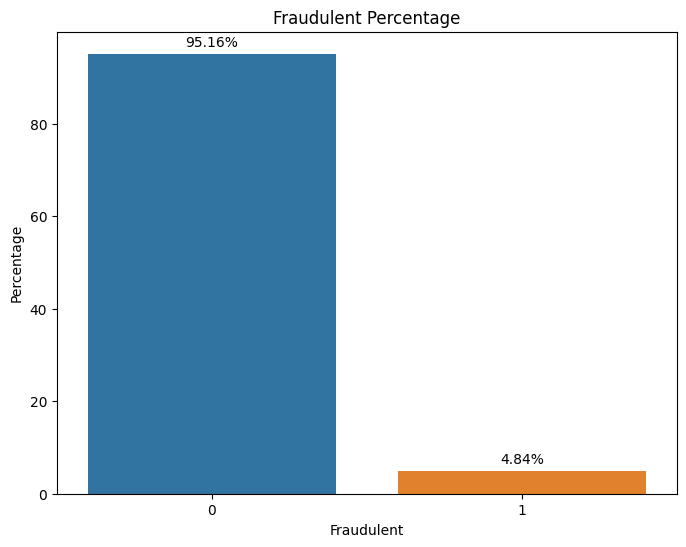

In [11]:
#SHOW THE OVERALL FREQUENCY OF FRAUDULENT AND NON FRADULENT RECORDS

total_samples = len(df)
fraudulent_counts = df['fraudulent'].value_counts()

# Calculate percentages
fraudulent_percentages = fraudulent_counts / total_samples * 100

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=fraudulent_percentages.index, y=fraudulent_percentages.values)
plt.xlabel('Fraudulent')
plt.ylabel('Percentage')
plt.title('Fraudulent Percentage')

for index, value in enumerate(fraudulent_percentages.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

##### The  fraudulent job posting data are very little and not enough compared to the non fraudulent. There is an imbalance in the dataset which might cause bias in the long run. It might be a good idea to apply bagging ensemble methods to train different samples on multiple models and acquire  predictions based on majority votee


### Categorical Variables

In [60]:
#Checking for correletion between Cateforical variables using chi squared contigency
from scipy.stats import  chi2_contingency

#get all the categorical variables 
categorical_variables = np.array(df.select_dtypes(include = ['category']).columns[:-1])

categorical_variables = list(categorical_variables)

chi2 ={}

#calculate p_value for each of the variables
for i in categorical_variables:
    contingency_table = pd.crosstab(df['fraudulent'],df[i])
    score = chi2_contingency(contingency_table)
    chi2.update({i : score[1]})
print(chi2)

{'telecommuting': 5.88986891319539e-06, 'has_company_logo': 3.5943691337776736e-268, 'has_questions': 2.515984961488263e-34, 'employment_type': 2.437701444068537e-13, 'required_experience': 3.79020423434021e-19, 'required_education': 7.684947749658579e-101}


##### We would reject the null hypothesis that the some of the categorical variables don't have any correletion with the response variable, "fraudulent"

### Objects

> Get all country names from the country abbrevations

> Drop department, title, location column,salary_range

In [67]:
#Get all the abbrevations
df['country_abb'] = df['location'].str.split(',', expand = True)[0]

df['country_abb'].unique()

array(['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG',
       'PL', 'GR', nan, 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA', 'CY',
       'HK', 'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE', 'TH',
       'PA', 'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE', 'CL',
       'UA', 'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT', 'HU',
       'BD', 'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID', 'ZM', 'NO', 'BH',
       'UG', 'CH', 'TT', 'SD', 'SK', 'AR', 'TW', 'PT', 'PE', 'CO', 'IS',
       'SI', 'MA', 'AM', 'TN', 'GH', 'AL', 'HR', 'CM', 'SV', 'NI', 'LK',
       'JM', 'KZ', 'KH'], dtype=object)

In [69]:
#put country abbrevations with corresponding country name in dictionary

country_dictionary = {
    'US': 'United States',
    'NZ': 'New Zealand',
    'DE': 'Germany',
    'GB': 'United Kingdom',
    'AU': 'Australia',
    'SG': 'Singapore',
    'IL': 'Israel',
    'AE': 'United Arab Emirates',
    'CA': 'Canada',
    'IN': 'India',
    'EG': 'Egypt',
    'PL': 'Poland',
    'GR': 'Greece',
    'PK': 'Pakistan',
    'BE': 'Belgium',
    'BR': 'Brazil',
    'SA': 'Saudi Arabia',
    'DK': 'Denmark',
    'RU': 'Russia',
    'ZA': 'South Africa',
    'CY': 'Cyprus',
    'HK': 'Hong Kong',
    'TR': 'Turkey',
    'IE': 'Ireland',
    'LT': 'Lithuania',
    'JP': 'Japan',
    'NL': 'Netherlands',
    'AT': 'Austria',
    'KR': 'South Korea',
    'FR': 'France',
    'EE': 'Estonia',
    'TH': 'Thailand',
    'PA': 'Panama',
    'KE': 'Kenya',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'RO': 'Romania',
    'MY': 'Malaysia',
    'FI': 'Finland',
    'CN': 'China',
    'ES': 'Spain',
    'SE': 'Sweden',
    'CL': 'Chile',
    'UA': 'Ukraine',
    'QA': 'Qatar',
    'IT': 'Italy',
    'LV': 'Latvia',
    'IQ': 'Iraq',
    'BG': 'Bulgaria',
    'PH': 'Philippines',
    'CZ': 'Czech Republic',
    'VI': 'U.S. Virgin Islands',
    'MT': 'Malta',
    'HU': 'Hungary',
    'BD': 'Bangladesh',
    'KW': 'Kuwait',
    'LU': 'Luxembourg',
    'NG': 'Nigeria',
    'RS': 'Serbia',
    'BY': 'Belarus',
    'VN': 'Vietnam',
    'ID': 'Indonesia',
    'ZM': 'Zambia',
    'NO': 'Norway',
    'BH': 'Bahrain',
    'UG': 'Uganda',
    'CH': 'Switzerland',
    'TT': 'Trinidad and Tobago',
    'SD': 'Sudan',
    'SK': 'Slovakia',
    'AR': 'Argentina',
    'TW': 'Taiwan',
    'PT': 'Portugal',
    'PE': 'Peru',
    'CO': 'Colombia',
    'IS': 'Iceland',
    'SI': 'Slovenia',
    'MA': 'Morocco',
    'AM': 'Armenia',
    'TN': 'Tunisia',
    'GH': 'Ghana',
    'AL': 'Albania',
    'HR': 'Croatia',
    'CM': 'Cameroon',
    'SV': 'El Salvador',
    'NI': 'Nicaragua',
    'LK': 'Sri Lanka',
    'JM': 'Jamaica',
    'KZ': 'Kazakhstan',
    'KH': 'Cambodia'
}

In [70]:
#Create Country column and fill the country names using the country_dictionary
for key, value in country_dictionary.items():
    df.loc[df['country_abb'] == key, 'country'] = value
            

In [71]:
#test
df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country_abb,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,United States
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,New Zealand


In [73]:
#drop department, title, location column,salary_range
df.drop(columns = ['department','title','location', 'salary_range'], inplace = True)

In [75]:
df.head(3)

,job_id,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country_abb,country
0,1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,United States
1,2,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,New Zealand
2,3,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,United States


## Visualizations to show relationships

In [76]:
df.to_csv("clean1.csv")

In [78]:
#clf = RandomForestClassifier(max_depth = 12, n_estimators = 200, random_state=42)

In [ ]:
#cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
#cv_scores

In [ ]:
#clf.fit(X_train, y_train)

In [ ]:
#pred = clf.predict(X_test)

In [ ]:
#from sklearn.metrics import accuracy_score

In [ ]:
#accuracy = accuracy_score(y_test, pred)

In [ ]:
#accuracy

In [ ]:
#print("Mean Accuracy:", cv_scores.mean())
#print("Standard Deviation of Accuracy:", cv_scores.std())

# Preprocessing input

import numpy as np

# Load your trained model
# For example:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

# Define a function for preprocessing the input
def preprocess_input(telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function, Rating):
    # Convert categorical variables to numerical values
    employment_type_map = {'Full-time': 1, 'Part-time': 2, 'Contract': 3, 'Temporary': 4, 'Other': 5, np.nan: 0}
    required_experience_map = {'Not Applicable': 1, 'Internship': 2, 'Entry level': 3, 'Associate': 4, 'Mid-Senior level': 5, 'Executive': 6, 'Director': 7, np.nan: 0}
    required_education_map = {'Not Applicable': 1, "Bachelor's Degree": 2, 'Master\'s Degree': 3, 'Doctorate': 4, 'Professional': 5, 'Some College Coursework Completed': 6, 'Vocational': 7, 'High School or equivalent': 8, 'Certification': 9, np.nan: 0}
    industry_map = {'Marketing and Advertising': 1, 'Computer Software': 2, 'Hospital & Health Care': 3, 'Internet': 4, 'Telecommunications': 5, np.nan: 0}
    function_map = {'Marketing': 1, 'Customer Service': 2, 'Sales': 3, 'Health Care Provider': 4, 'Engineering': 5, 'Information Technology': 6, 'Design': 7, 'Education': 8, 'Other': 9, np.nan: 0}
    
    # Map input variables to numerical values
    employment_type_mapped = employment_type_map.get(employment_type, 1)
    required_experience_mapped = required_experience_map.get(required_experience, 1)
    required_education_mapped = required_education_map.get(required_education, 1)
    industry_mapped = industry_map.get(industry, 1)
    function_mapped = function_map.get(function, 1)
    
    # Return preprocessed input
    return [telecommuting, has_company_logo, has_questions, employment_type_mapped, required_experience_mapped, required_education_mapped, industry_mapped, function_mapped, Rating]

# Get input from user
telecommuting = int(input("Enter 0 or 1 for telecommuting: "))
has_company_logo = int(input("Enter 0 or 1 for has_company_logo: "))
has_questions = int(input("Enter 0 or 1 for has_questions: "))
employment_type = input("Enter employment_type: ")
required_experience = input("Enter required_experience: ")
required_education = input("Enter required_education: ")
industry = input("Enter industry: ")
function = input("Enter function: ")
Rating = int(input("Enter Rating: "))

# Preprocess input
preprocessed_input = preprocess_input(telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function, Rating)

# Reshape input for model prediction
input_array = np.array(preprocessed_input).reshape(1, -1)

# Make predictions
# predicted_class = model.predict(input_array)
# print("Predicted class:", predicted_class)


In [ ]:
#original_labels = encoder.classes_

In [ ]:
#new=df.copy()

In [ ]:
#mapping

encoding_mappings = {}

for column in columns_to_transform:
    encoder = LabelEncoder()  # Initialize a new encoder for each column
    new[column] = encoder.fit_transform(new[column])  # Fit-transform the column
    
    # Store the mapping between original values and encoded values
    encoding_mappings[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Print encoding mappings for each column
for column, mapping in encoding_mappings.items():
    print("Column:", column)
    print("Encoding Mapping:", mapping)
    print()

In [ ]:
'''from sklearn.preprocessing import LabelEncoder

columns_to_transform = ["required_experience", "employment_type", "required_education", "industry", "function"]

def encode_columns_and_get_mappings(dataframe, columns_to_transform):
    """
    Encode categorical columns in the DataFrame using LabelEncoder and 
    return the mapping between original and encoded values.
    
    Args:
    - dataframe (DataFrame): The DataFrame containing the columns to be encoded.
    - columns_to_transform (list): List of column names to be encoded.
    
    Returns:
    - encoded_dataframe (DataFrame): The DataFrame with encoded columns.
    - encoding_mappings (dict): Dictionary containing the mapping between 
                                original and encoded values for each column.
    """
    encoding_mappings = {}  # Initialize dictionary to store mappings
    
    # Loop through each column to be transformed
    
    for column in columns_to_transform:
        encoder = LabelEncoder()  # Initialize a new encoder for each column
        dataframe[column] = encoder.fit_transform(dataframe[column])  # Fit-transform the column
        
        # Store the mapping between original values and encoded values
        encoding_mappings[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    
    return dataframe, encoding_mappings

# Example usage:
new_encoded, mappings = encode_columns_and_get_mappings(new, columns_to_transform)

# Print encoding mappings for each column
for column, mapping in mappings.items():
    print("Column:", column)
    print("Encoding Mapping:", mapping)
    print()
'''